# 在采用随机梯度下降算法训练神经网络时，使用 tf.train.ExponentialMovingAverage 滑动平均操作的意义在于提高模型在测试数据上的健壮性（robustness）。
## tensorflow 下的 tf.train.ExponentialMovingAverage 需要提供一个衰减率（decay）。该衰减率用于控制模型更新的速度，ExponentialMovingAverage 对每一个（待更新训练学习的）变量（variable）都会维护一个影子变量（shadow variable）。影子变量的初始值就是这个变量的初始值， 
## shadow_variable=decay×shadow_variable+(1−decay)×variable

## 由上述公式可知， decay 控制着模型更新的速度，越大越趋于稳定。实际运用中，decay 一般会设置为十分接近 1 的常数（0.99或0.999）。为了使得模型在训练的初始阶段更新得更快，ExponentialMovingAverage 还提供了 num_updates 参数来动态设置 decay 的大小： 
## decay=min{decay,1+num_updates10+num_updates}
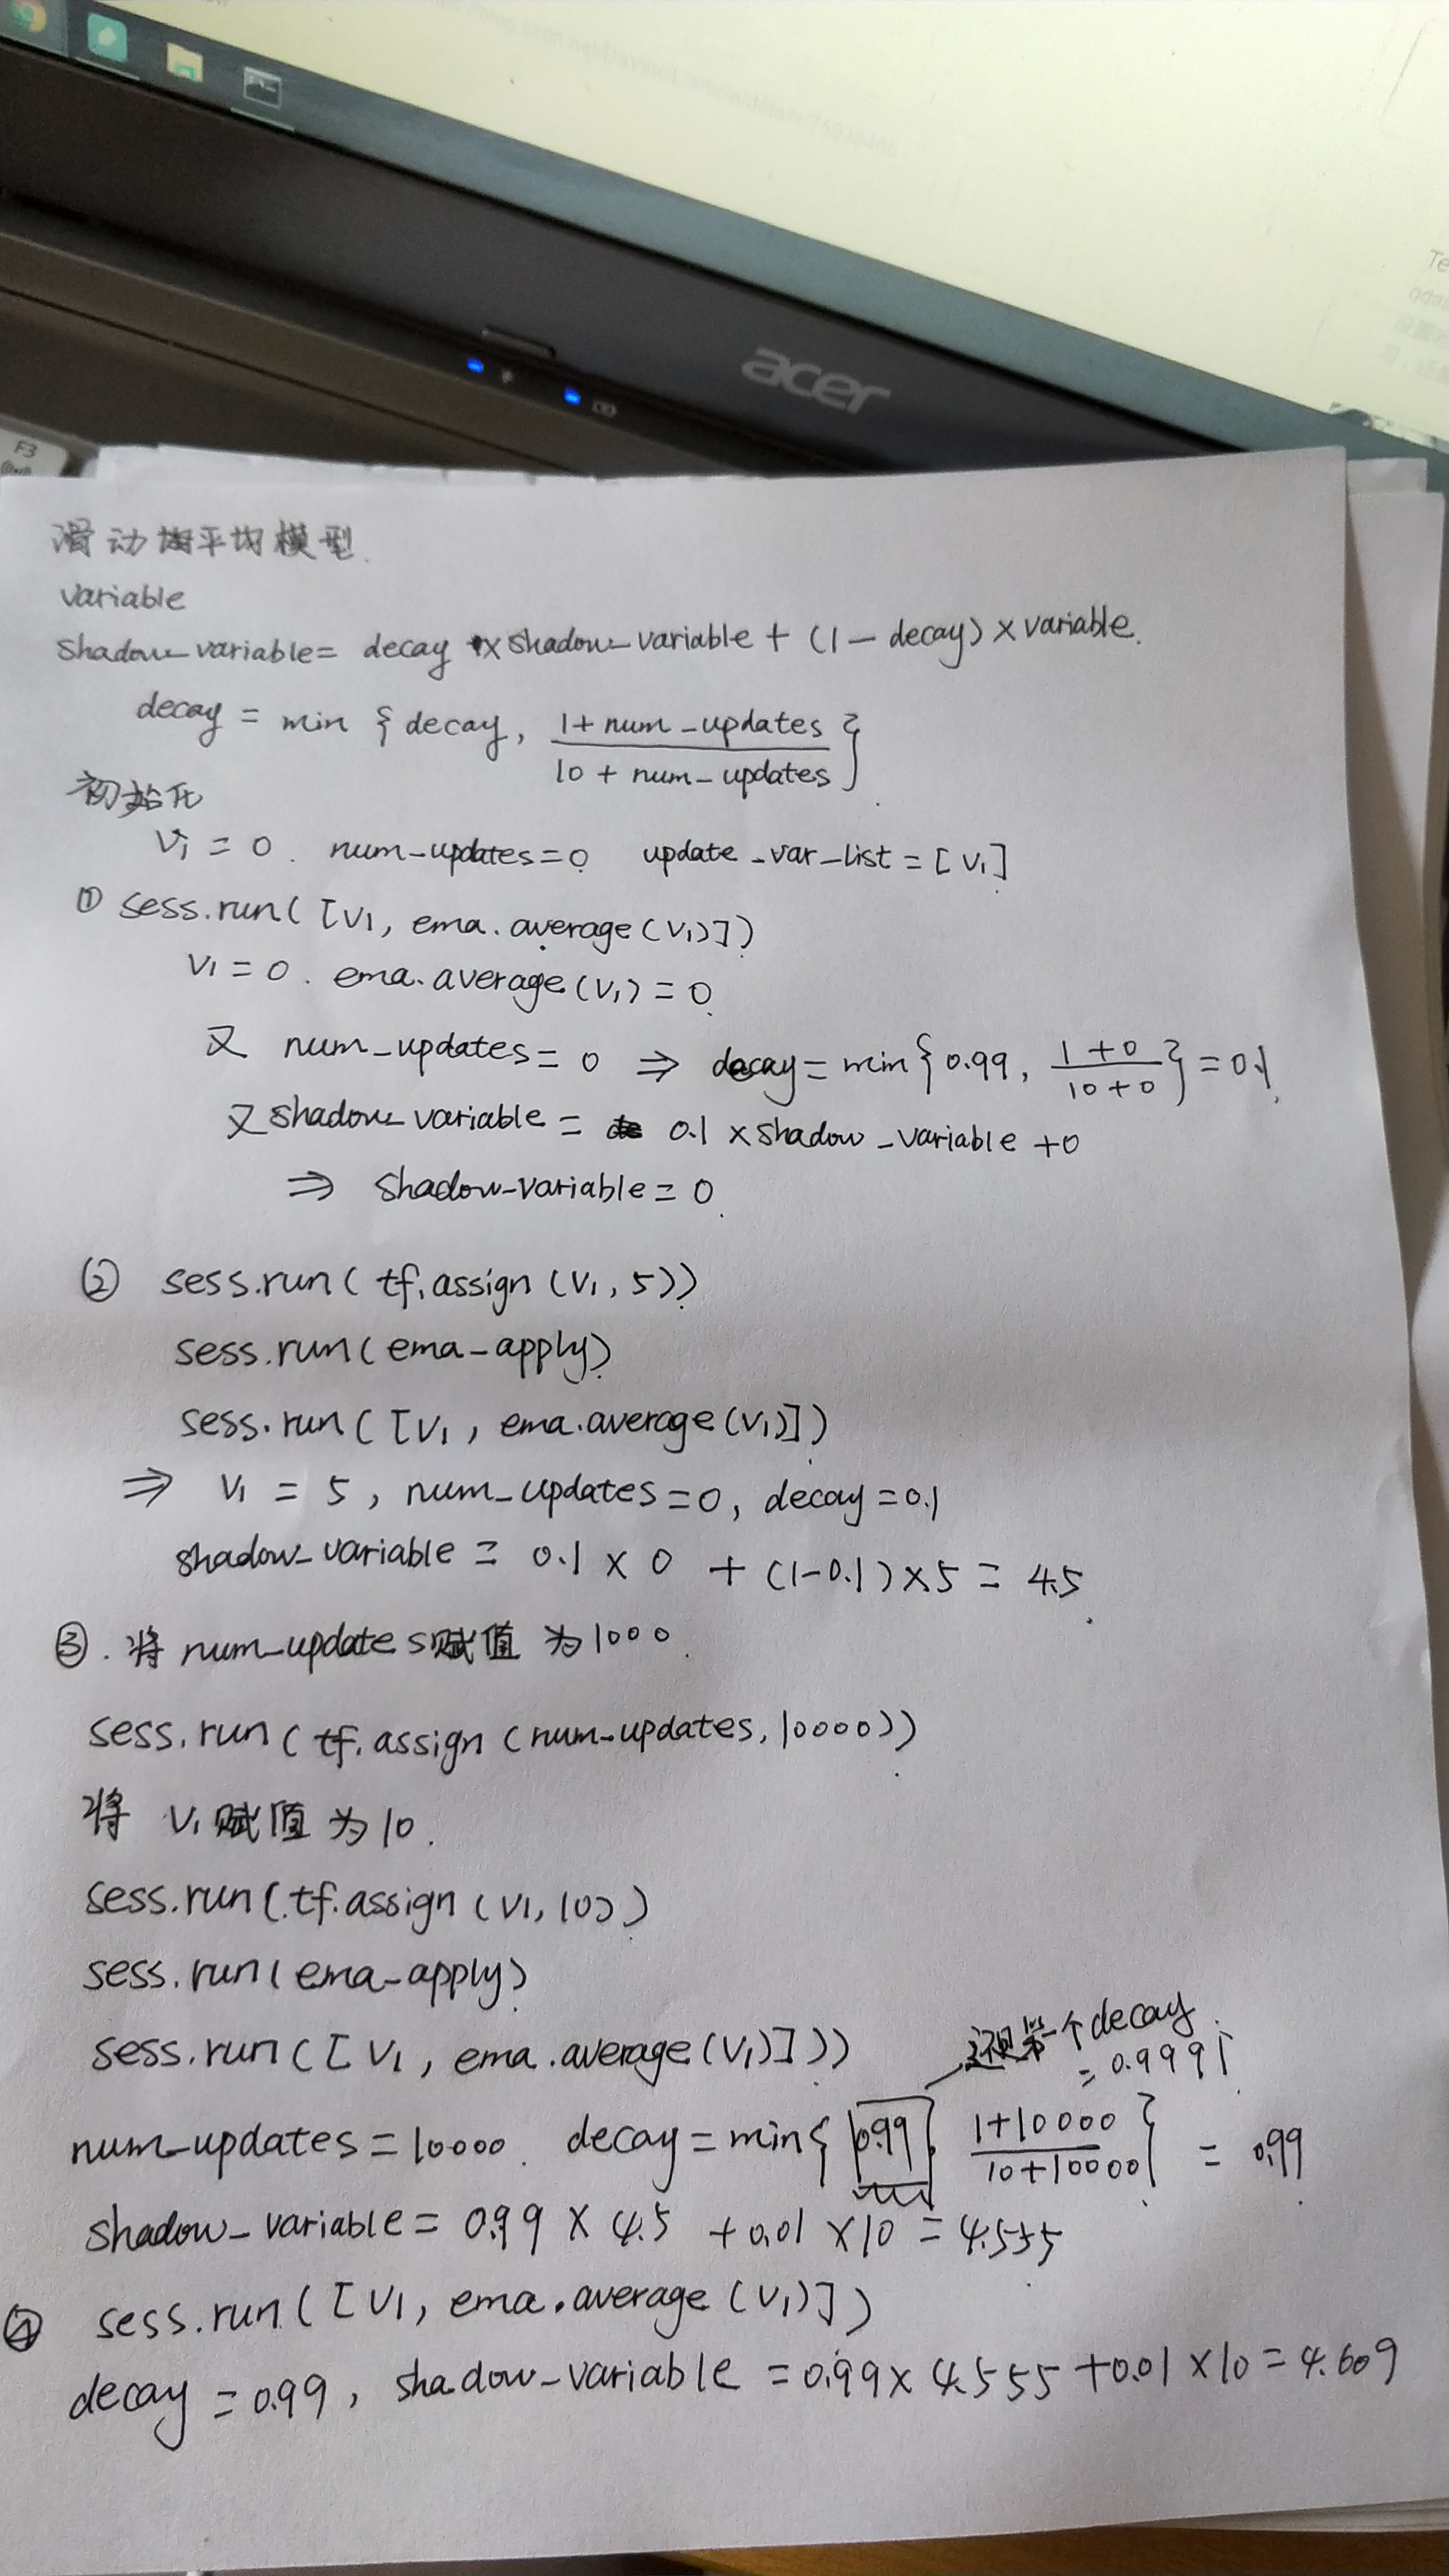

In [ ]:
import tensorflow as tf

# 定义一个32位浮点数的变量，初始值位0.0
v1 =tf.Variable(dtype=tf.float32, initial_value=0.)

# 衰减率decay，初始值位0.99
decay = 0.99

# 定义num_updates，同样，初始值位0
num_updates = tf.Variable(0, trainable=False)

# 定义滑动平均模型的类，将衰减率decay和num_updates传入。
ema = tf.train.ExponentialMovingAverage(decay=decay, num_updates=num_updates)

# 定义更新变量列表
update_var_list = [v1]

# 使用滑动平均模型
ema_apply = ema.apply(update_var_list)

# Tensorflow会话
with tf.Session() as sess:
    # 初始化全局变量
    sess.run(tf.global_variables_initializer())

    # 输出初始值
    print(sess.run([v1, ema.average(v1)]))      
    # [0.0, 0.0]（此时 num_updates = 0 ⇒ decay = .1, ），
    # shadow_variable = variable = 0.

    # 将v1赋值为5
    sess.run(tf.assign(v1, 5))

    # 调用函数，使用滑动平均模型
    sess.run(ema_apply)

    # 再次输出
    print(sess.run([v1, ema.average(v1)]))     
    # 此时，num_updates = 0 ⇒ decay =0.1,  v1 = 5; 
    # shadow_variable = 0.1 * 0 + 0.9 * 5 = 4.5 ⇒ variable

    # 将num_updates赋值为10000
    sess.run(tf.assign(num_updates, 10000))

    # 将v1赋值为10
    sess.run(tf.assign(v1, 10))

    # 调用函数，使用滑动平均模型
    sess.run(ema_apply)

    # 输出
    print(sess.run([v1, ema.average(v1)]))      
    # decay = 0.99,shadow_variable = 0.99 * 4.5 + .01*10 ⇒ 4.555

    # 再次使用滑动平均模型
    sess.run(ema_apply)

    # 输出
    print(sess.run([v1, ema.average(v1)]))      
    # decay = 0.99，shadow_variable = .99*4.555 + .01*10 = 4.609